In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [44]:
df = pd.read_csv("data.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


* id: Unique ID for the customer
* Gender: Gender of the customer
* Age: Age of the customer
* Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
* Region_Code: Unique code for the region of the customer
* Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
* Vehicle_Age: Age of the Vehicle
* Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
* Annual_Premium: The amount customer needs to pay as premium in the year
* Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage: Number of Days, Customer has been associated with the company
* Response: [1 : Customer is interested, 0 : Customer is not interested]

## EDA

In [45]:
df.shape

(5000, 12)

In [46]:
# checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5000 non-null   int64  
 1   Gender                5000 non-null   object 
 2   Age                   5000 non-null   int64  
 3   Driving_License       5000 non-null   int64  
 4   Region_Code           5000 non-null   float64
 5   Previously_Insured    5000 non-null   int64  
 6   Vehicle_Age           5000 non-null   object 
 7   Vehicle_Damage        5000 non-null   object 
 8   Annual_Premium        5000 non-null   float64
 9   Policy_Sales_Channel  5000 non-null   float64
 10  Vintage               5000 non-null   int64  
 11  Response              5000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 468.9+ KB


In [48]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.68200,0.997800,26.201000,0.441600,30929.683400,112.909600,156.145600,0.123800
std,1443.520003,15.47505,0.046857,13.173918,0.496627,16732.411341,53.607076,83.681385,0.329386
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,1250.750000,24.00000,1.000000,15.000000,0.000000,24814.000000,40.750000,85.000000,0.000000
50%,2500.500000,36.00000,1.000000,28.000000,0.000000,31967.000000,136.000000,156.000000,0.000000
75%,3750.250000,49.00000,1.000000,35.000000,1.000000,39816.000000,152.000000,229.000000,0.000000
max,5000.000000,84.00000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


In [49]:
# checking distribution for target column
df['Response'].value_counts()

Response
0    4381
1     619
Name: count, dtype: int64

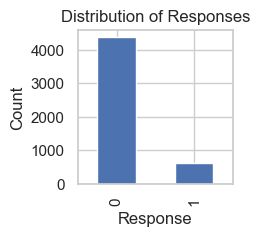

In [50]:
value_counts = df['Response'].value_counts()

plt.figure(figsize=(2, 2))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Distribution of Responses')

# Show the plot
plt.show()

<Axes: >

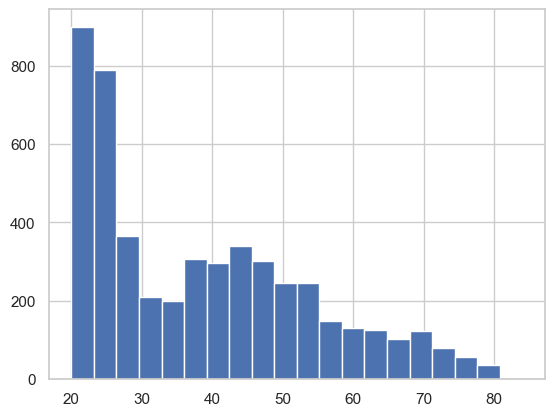

In [51]:
# checking distribution for age col
df['Age'].hist(bins=20)

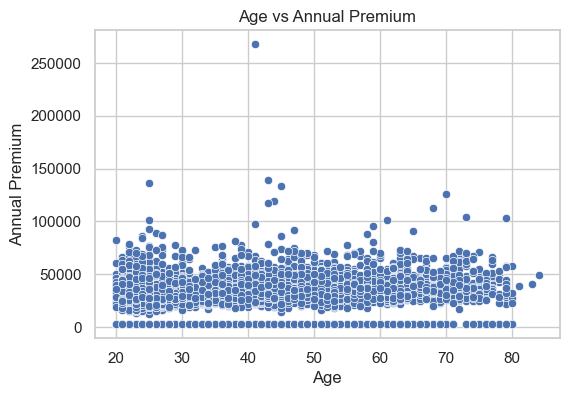

In [52]:
# Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Annual_Premium', data=df)
plt.title('Age vs Annual Premium')
plt.xlabel('Age')
plt.ylabel('Annual Premium')
plt.show()

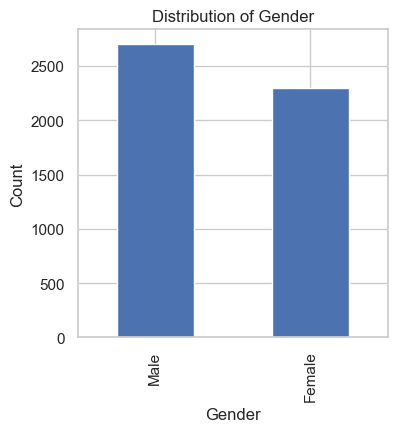

In [53]:
# Gender-Response comparison

value_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))

# Create the bar plot
value_counts.plot(kind='bar')

# Customize the plot (optional)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

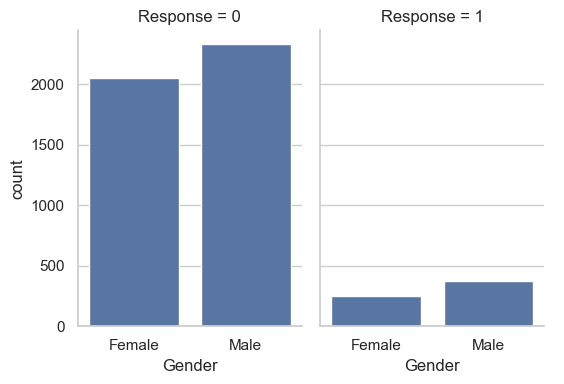

In [54]:
data = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

g = sns.catplot(x="Gender", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

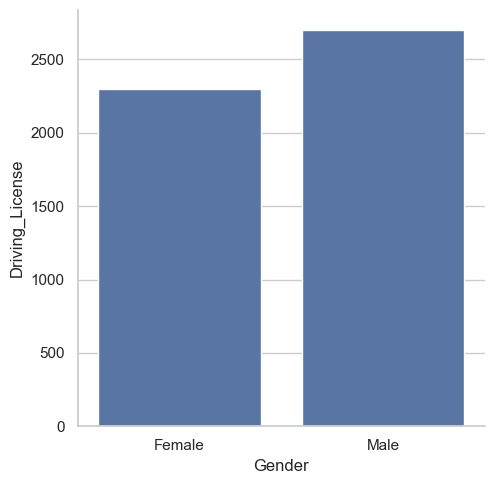

In [55]:
# driving license by gender

data=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
sns.catplot(x="Gender", y="Driving_License", data=data, kind="bar");

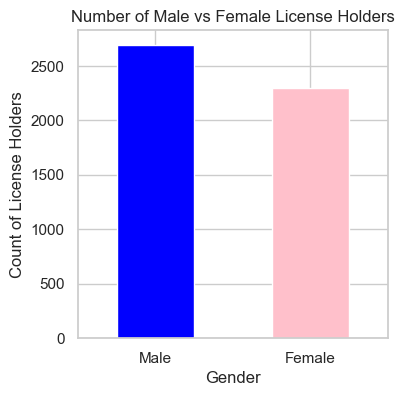

In [56]:
# Filter for only license holders (Driving_License == 1)
license_holders = df[df['Driving_License'] == 1]

# Group by Gender and count the number of license holders per gender
gender_counts = license_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()


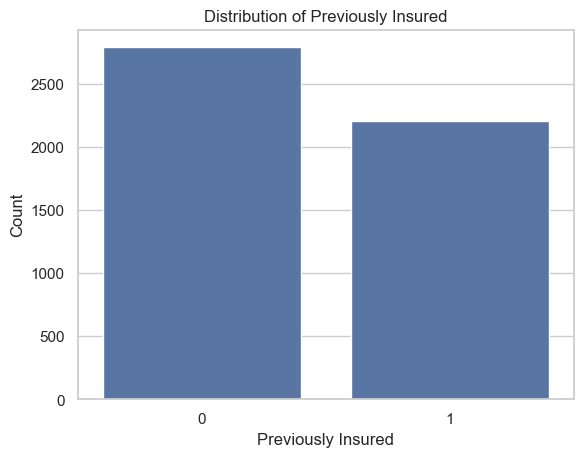

In [58]:
# customers with existing insurance

sns.countplot(x="Previously_Insured", data=df)
plt.title("Distribution of Previously Insured")
plt.xlabel("Previously Insured")
plt.ylabel("Count")
plt.show()

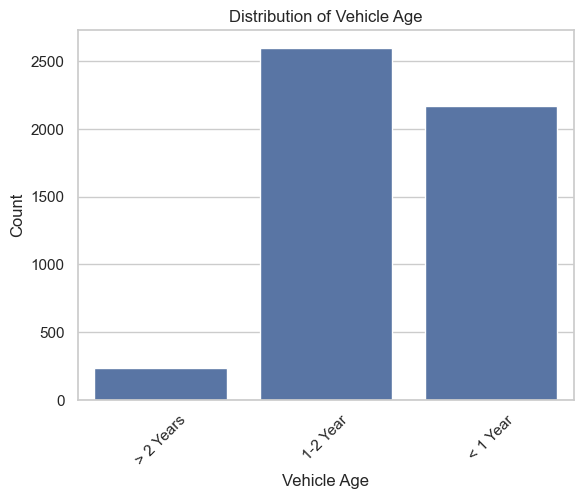

In [59]:
# checking vehicle age dist

sns.countplot(x='Vehicle_Age', data=df)
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
plt.show()

In [60]:
# Response vs Vehicle_Age

data=df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data

,Vehicle_Age,Response,count
0,1-2 Year,0,2139
1,1-2 Year,1,459
2,< 1 Year,0,2080
3,< 1 Year,1,89
4,> 2 Years,0,162
5,> 2 Years,1,71


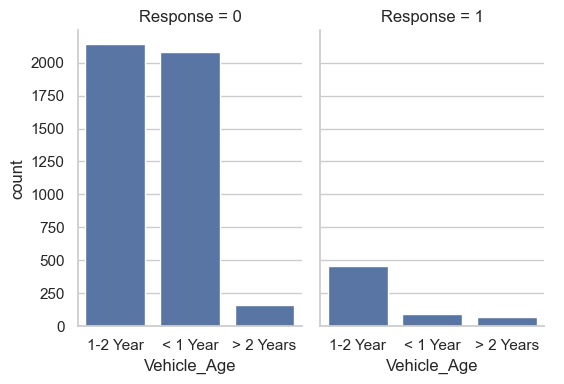

In [61]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=data, kind="bar",
                height=4, aspect=.7);

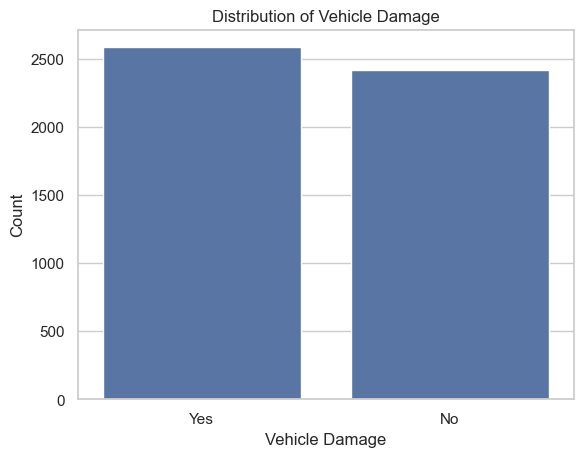

In [62]:
# dist for Vehicle_Damage col

sns.countplot(data=df, x='Vehicle_Damage')
plt.title('Distribution of Vehicle Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.show()

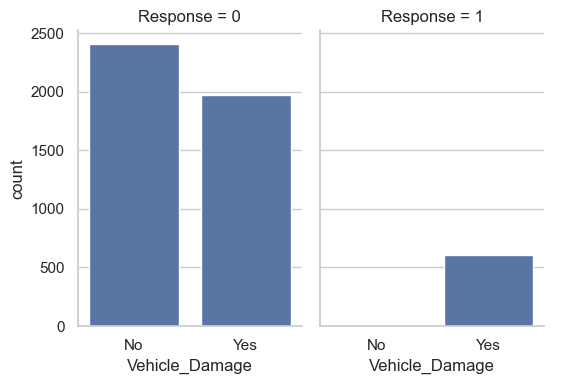

In [63]:
data = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response", data=data, kind="bar", height=4, aspect=.7);

In [64]:
# checking stats for Annual_Premium
df['Annual_Premium'].describe()

count      5000.000000
mean      30929.683400
std       16732.411341
min        2630.000000
25%       24814.000000
50%       31967.000000
75%       39816.000000
max      267698.000000
Name: Annual_Premium, dtype: float64

<Axes: >

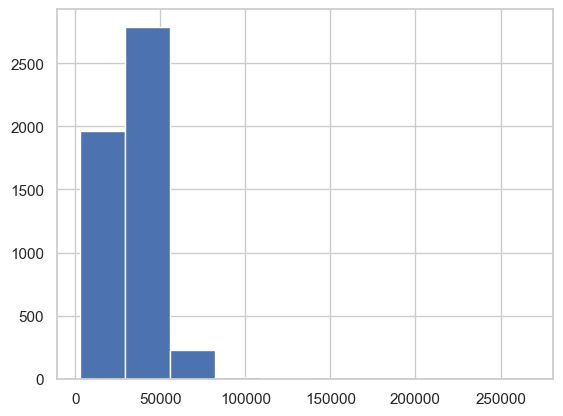

In [65]:
df['Annual_Premium'].hist(bins=10)

In [66]:
df[df['Annual_Premium']>200000]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1412,1413,Female,41,1,28.0,0,1-2 Year,Yes,267698.0,124.0,63,1


## Data Preprocessing

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5000 non-null   int64  
 1   Gender                5000 non-null   object 
 2   Age                   5000 non-null   int64  
 3   Driving_License       5000 non-null   int64  
 4   Region_Code           5000 non-null   float64
 5   Previously_Insured    5000 non-null   int64  
 6   Vehicle_Age           5000 non-null   object 
 7   Vehicle_Damage        5000 non-null   object 
 8   Annual_Premium        5000 non-null   float64
 9   Policy_Sales_Channel  5000 non-null   float64
 10  Vintage               5000 non-null   int64  
 11  Response              5000 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 468.9+ KB


In [68]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [69]:
# Keep only rows where Gender is Male or Female, then map
df = df[df['Gender'].isin(['Male', 'Female'])].copy()
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1}).astype(int)

df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [70]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Vehicle_Age >> object
Vehicle_Damage >> object
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64


In [71]:
# creating dummy cols for categorical features

df=pd.get_dummies(df,drop_first=True)
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,False,True,True
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,False,False,False


In [72]:
for col in df.columns:
    print(f"{col} >> {df[col].dtype}")

id >> int64
Gender >> int64
Age >> int64
Driving_License >> int64
Region_Code >> float64
Previously_Insured >> int64
Annual_Premium >> float64
Policy_Sales_Channel >> float64
Vintage >> int64
Response >> int64
Vehicle_Age_< 1 Year >> bool
Vehicle_Age_> 2 Years >> bool
Vehicle_Damage_Yes >> bool


In [73]:
# cols renaming and keeping dtype as int

df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')
df['Vehicle_Damage_Yes'] = df['Vehicle_Damage_Yes'].astype('int')

for column in cat_feat:
    df[column] = df[column].astype('str')

In [74]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [83]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [84]:
train_target = df['Response']


In [85]:
train = df.drop(['Response'], axis=1)
train.head(1)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.343684,1,28.0,0,0.142695,26.0,0.727288,0,1,1


## Model Trainer - Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [89]:
my_params = {
    'n_estimators': [300],                # fixed
    'min_samples_split': [5, 7, 9],       # near 7
    'min_samples_leaf': [4, 6, 8],        # near 6
    'max_depth': [8, 9, 10, 11],          # near 10
    'criterion': ['entropy', 'gini']      # try both
}

clf = RandomForestClassifier()
model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=my_params,
    n_iter=10,
    cv=4,
    verbose=1,
    random_state=101,
    n_jobs=-1
)
model.fit(x_train, y_train)


Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [8, 9, 10, 11],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 9],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

In [90]:
best_params = model.best_params_

print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 8, 'criterion': 'entropy'}


In [91]:
# save model

import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [92]:
# loading back pickle file

rf_load = pickle.load(open(filename, 'rb'))

## Model Evaluation

In [93]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1100
           1       0.00      0.00      0.00       150

    accuracy                           0.88      1250
   macro avg       0.44      0.50      0.47      1250
weighted avg       0.77      0.88      0.82      1250

